In [120]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [171]:
df = pd.read_csv("reports.csv")
df['Date'] = pd.to_datetime(df['Date'], format='%d %B %Y')
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [39]:
success_reject_order = df.groupby("Status").Cost.sum()
cost_list = success_reject_order.tolist()
status = success_reject_order.index.tolist()

Text(0.5, 0, 'Total Amount Rs: 53885.94')

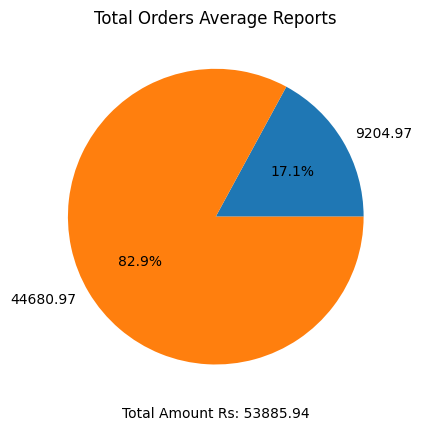

In [172]:
plt.pie(cost_list, labels=cost_list, autopct='%1.1f%%')
plt.title("Total Orders Average Reports")
plt.xlabel(f"Total Amount Rs: {success_reject_order.sum()}")

In [156]:
def report_by_year(year):
    monthly_report = df[df.Status==True]
    monthly_report = monthly_report[monthly_report.Year==year].groupby("Month").Cost.sum()
    
    month_index = monthly_report.index.to_list()
    month_value = monthly_report.to_list()
    
    month_dict = {
        1:"Jan", 2:"Feb", 3:"Mar",
        4:"Apr", 5:"May", 6:"Jun",
        7:"Jul", 8:"Aug", 9:"Sep",
        10:"Oct",11:"Nov", 12:"Dec"
    }
    x = np.zeros(12)
    month_index2 = np.array(month_index) - 1
    x[month_index2] = month_value
    print(x)
    plt.bar(month_dict.values(), x)
    plt.title(f"Monthly Report {year}")
    
    

[   0.      0.      0.      0.      0.   1982.36 2440.04 6000.65 3566.46
  880.34 3681.56 3068.91]


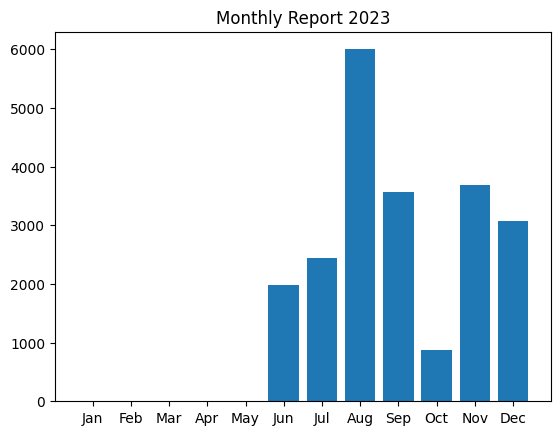

In [158]:
# report_by_year(2023)
# report_by_year(2022)
report_by_year(2023)

In [159]:
yearly_report = df.groupby("Year").Cost.sum()

Text(0, 0.5, 'Spend of amount')

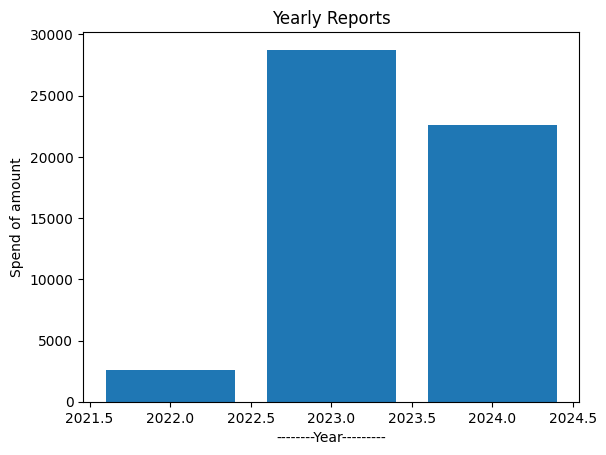

In [173]:
year_index = yearly_report.index.to_list()
year_value = yearly_report.to_list()
plt.bar(year_index, year_value)
plt.title("Yearly Reports")
plt.xlabel("--------Year---------")
plt.ylabel("Spend of amount")

In [186]:
df.groupby(["Year", "Month", "StoreName"]).Cost.sum()

Year  Month  StoreName       
2022  3      Lazeez              1896.55
             Mouchak              452.50
             SuperHajiBiryani     213.70
2023  6      BiryaniBlues        1192.30
             BrarBuffet&Dhaba     323.50
                                  ...   
2024  7      KFC                  465.03
             NafeesRestaurant     683.91
             PizzaCastle          459.50
             PizzaHut             335.28
             RiceStory            402.84
Name: Cost, Length: 80, dtype: float64